# Tweet Generation Baseline

In [12]:
from torchvision import __version__
print(__version__)

0.8.1


In [2]:
from fastai.text import *
import pandas as pd

data = pd.read_fwf("../data/individual/elonmusk.txt", header=None)
data = data[data[0].notna()]
data.head()

,0,1,2,3,4,5,6
0,"As a thank you to Tesla short sellers, we name...",NaN,NaN,NaN,NaN,NaN,NaN
1,R2D2’s Dad,NaN,NaN,NaN,NaN,NaN,NaN
2,Amazing work by Tesla team. Built entire new g...,NaN,NaN,NaN,NaN,NaN,NaN
3,.@cgpgrey drives a Tesla across the loneliest ...,NaN,NaN,NaN,NaN,NaN,NaN
4,"We don’t make much money on this product, so $...",NaN,NaN,NaN,NaN,NaN,NaN


## Load and explore data

In [3]:
data = (TextList.from_df(data, cols=0)
                .split_by_rand_pct(0.1)
               .label_for_lm()  
                .databunch(bs=48))

data.show_batch()

/Users/leviv/opt/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603740477510/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"xxbos xxunk drives a xxmaj tesla across the xxunk road in xxmaj america xxbos xxmaj we do n’t make much money on this product , so $ 1000 actually means a lot xxbos xxmaj exciting to see some xxmaj tesla collision repair xxunk already completing within 24 hrs . xxmaj aiming for same day soon , then under an hour . xxbos xxmaj to activate the xxmaj model x holiday"
1,falcon 9 in background on 40 xxbos xxmaj xxunk make good points xxbos got xxunk xxunk leaked xxbos xxmaj rocket soft landed in the ocean within 10 m of target & & xxunk vertical ! xxmaj high probability of good droneship landing in non - stormy weather . xxbos xxmaj tracking shot of xxmaj falcon water landing xxbos xxmaj sunset at the xxmaj gigafactory xxbos xxmaj that was a total
2,"are underappreciated xxbos xxmaj most people do n’t know that the xxmaj tesla xxmaj supercharger network allows easy long distance travel throughout xxup xxunk , most of xxmaj europe , xxmaj canada and xxmaj china xxbos xxmaj that 's not just xxunk ( a xxunk xxunk at times ) . xxmaj tesla really is under massive xxunk by short sellers xxbos spacex will go public at some point , as"
3,"am against xxunk of violence & & xxunk xxunk in any xxunk . xxmaj please do not use them in my name or at all . xxbos xxmaj xxunk car and xxunk across xxmaj london . xxmaj super fun ! xxmaj next time minus the xxunk xxunk . xxbos xxmaj price increase for xxmaj tesla xxup fsd postponed until version 10 with smart summon is in wide release , which"
4,"going at xxunk speed , we still xxunk sign xxbos xxmaj launching third flight of this xxmaj dragon spacecraft to @space_station tomorrow xxbos xxmaj in other xxunk , you may be able to get a xxmaj tesla before the $ xxunk xxup us tax credit drops in 2 weeks , even if you have n’t placed an order yet xxbos xxmaj wow , amazing xxmaj tesla xxunk drive happening xxbos"


## Create deep learning model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,4.925531,4.252031,0.270833,01:11


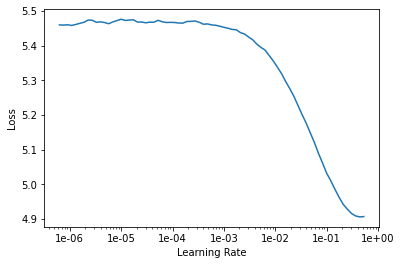

In [4]:
# Create deep learning model
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3, model_dir = '/tmp/work')

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot(skip_end=15)

# Fit the model based on selected learning rate
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

# Predict Tweets starting from the given words 
N_WORDS = 20

In [5]:
preds = []
for i in range(0,30):
    p = learn.predict("Climate change will", N_WORDS, temperature=0.75)
    preds.append(p)

preds

['Climate change will be important in America , where there is a risk of climate change , so climate change is a',
 'Climate change will take place in North America and Europe is on the side of the cool and cool sea',
 'Climate change will change Climate Change Climate global warming ( CLIMATE change ) . Climate change will increase',
 'Climate change will be heavy on Earth , but will cause at least one better climate change . In each climate',
 'Climate change will best be achieved by adding a climate change system that will create climate change . Climate change is what',
 'Climate change will be a significant factor in climate change . Climate change will increase and increase the climate change , and',
 'Climate change will cause a climate change . We need to change our climate , not even climate change . But',
 'Climate change will be a major feature of Climate change , but Climate change will soon be a factor in climate',
 'Climate change will be a major factor in climate change 

In [6]:
learn.export('elonmusk.pkl')

x = load_learner('', 'elonmusk.pkl')
print(x.predict("Climate change will", N_WORDS, temperature=0.75))

Climate change will cause climate change , to change climate change and climate change . Climate change is the source of climate
